In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df = pd.read_csv('vgames2.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


**1. 데이터 정제**

**결측값 제거**

In [199]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# df[df['Year'].isnull() | df['Genre'].isnull() | df['Publisher'].isnull()]
# 대체할 수 없어 삭제한다
df_clean = df.dropna()
df_clean = df_clean.drop(['Unnamed: 0'], axis=1).reset_index(drop=True)
df_clean

In [201]:
df_clean.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

**Sales의 K, M값 숫자로 변환 및 데이터 타입 변환**

In [202]:
# df_clean = df_clean.replace({'K':'000', 'M':'000000'}, regex=True)
df_clean['EU_Sales'] = df_clean['EU_Sales'].str.replace('K', '000').str.replace('M', '000000')
df_clean['NA_Sales'] = df_clean['NA_Sales'].str.replace('K', '000').str.replace('M', '000000')
df_clean['JP_Sales'] = df_clean['JP_Sales'].str.replace('K', '000').str.replace('M', '000000')
df_clean['Other_Sales'] = df_clean['Other_Sales'].str.replace('K', '000').str.replace('M', '000000')
df_clean = df_clean.astype({'Year':'int', 'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})
# df_clean.Genre = df_clean.Genre.astype('category')
df_clean.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

**Year 칼럼 값 보정**

In [203]:
#추정할 수 있으므로 보정한다
def Year_fix(x):
  if x <= 22:
    return x + 2000
  elif x > 22 and x < 100:
    return x + 1900
  else:
    return x
df_test = df_clean.copy()
df_test.Year = df_test.Year.apply(Year_fix)
df_test[df_test.Year < 1000]

df_clean.Year = df_clean.Year.apply(Year_fix)
df_clean.Year

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

**Total_Sales 항목 추가**

In [204]:
#전세계 전체 출고량을 알아보기 위해 Total_Sales항목 추가
df_clean['Total_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


**게임 플랫폼 그룹 항목 추가**

In [205]:
#게임 플랫폼 분류(PC, Portable, Console)
df_clean["Platform_Groups"] = np.where(df_clean.Platform == "PC", "PC", \
                       np.where((df_clean.Platform == "3DS") | (df_clean.Platform == "DS") | (df_clean.Platform == "GB") | \
                               (df_clean.Platform == "GBA") | (df_clean.Platform == "GC") | (df_clean.Platform == "PSP") |  \
                               (df_clean.Platform == "PSV") | (df_clean.Platform == "WS"), "Portable", "Console"))
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_Groups
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Portable
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Console
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Portable
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Portable
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Console
...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,Portable
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,Portable
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,Console
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,Portable


**중복 데이터 확인**

In [206]:
# 중복 갯수 확인
duplicate = df_clean[df_clean['Name'].duplicated()]
duplicate.count()

Name               4946
Platform           4946
Year               4946
Genre              4946
Publisher          4946
NA_Sales           4946
EU_Sales           4946
JP_Sales           4946
Other_Sales        4946
Total_Sales        4946
Platform_Groups    4946
dtype: int64

In [207]:
# 중복 개별 값 확인
duplicate.sort_values(by='Total_Sales', ascending=False).head(10)
df_clean[df_clean.Name == "Battlefield 3"]
# 상위 10개 중복값으로 확인해본 결과 중복 값은 은 멀티플랫폼으로 출시한 게임의 경우로, 
# 대표 플랫폼 1개 이외에는 출고량이 미미한 수준이므로 분석대상인 출고량이 높은 게임 순위에 영향이 없을 것 같아 무시한다 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_Groups
7328,Battlefield 3,PC,2011,Shooter,Electronic Arts,0.89,1.43,0.00,0.48,2.80,PC
7852,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2130000.00,0.06,0.69,2130005.21,Console
9269,Battlefield 3,PS3,2011,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23,Console


**2. 전체 데이터 분포 확인**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


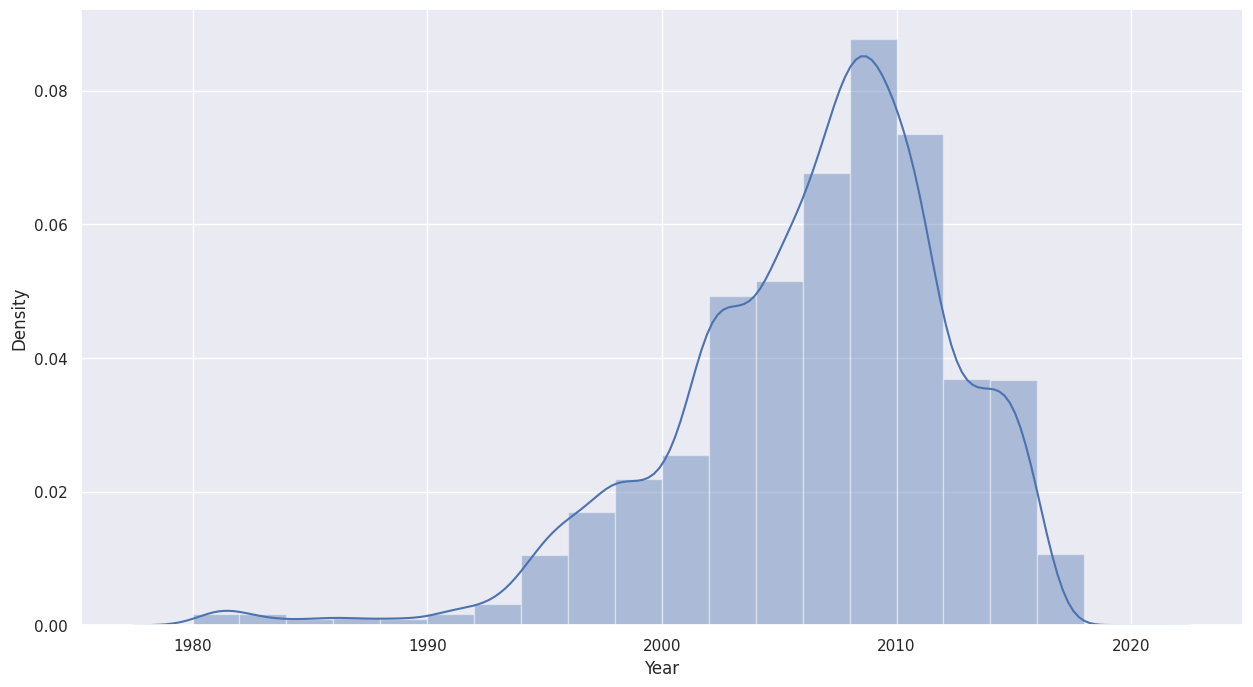

In [208]:
sns.distplot(df_clean.Year, bins=20);
#데이터가 2000년에서 2020년 사이에 밀집되어 있으므로 2000년대 이후의 데이터만으로 분석하도록 한다

In [ ]:
df_clean = df_clean[df_clean.Year >= 2000]
df_clean

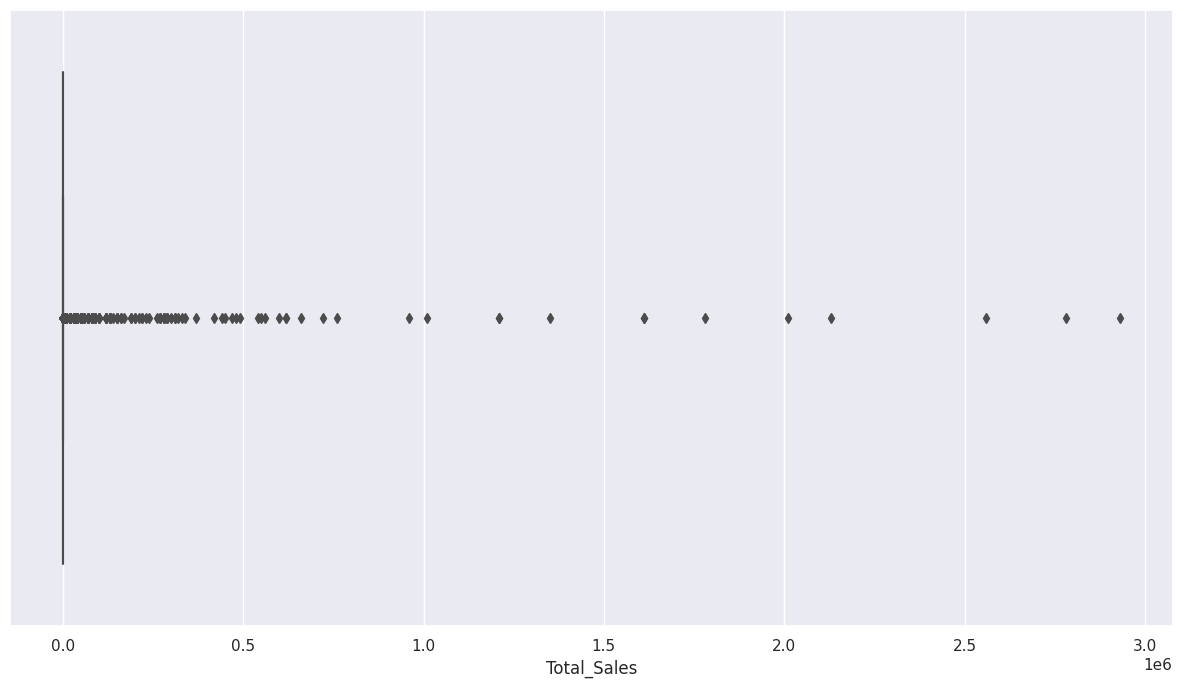

In [210]:
sns.boxplot(x = "Total_Sales",  data = df_clean);
#전체 데이터의 대부분이 0에 쏠려있음을 알 수 있다

In [211]:
less = df_clean[df_clean.Total_Sales < 0.5]
larger = df_clean[df_clean.Total_Sales >= 0.5]
len(larger) /len(less)  
# 0.5보다 큰 데이터가 30%나 되고, 게임산업의 특성상 경쟁이 심하고 게임별 편차가 크기 때문에 이상치로 판단하지 않는다

0.3069315996703599

In [212]:
df_clean.to_csv('data_cleaned.csv', index=False)
data_clean = df_clean.copy()

**<<데이터 분석>>**

**1. 지역별 선호하는 게임 장르**

---




In [213]:
data_clean = pd.read_csv('data_cleaned.csv')

In [214]:
data_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_Groups
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Portable
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Console
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Portable
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Portable
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Console
...,...,...,...,...,...,...,...,...,...,...,...
14268,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02,Portable
14269,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,Portable
14270,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,Portable
14271,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,Console


In [215]:
all_region = data_clean.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
all_region

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,2850745.06,4020465.25,700127.99,910175.95
Adventure,270082.14,140049.82,60036.91,80015.02
Fighting,470160.15,1390074.02,180044.57,60031.95
Misc,3740356.75,2090192.18,150082.44,130070.35
Platform,2990255.50,1290139.95,55.09,100041.94
Puzzle,10064.59,50040.39,23.74,10.26
Racing,2860267.97,580192.46,27.72,330069.72
Role-Playing,1210270.43,30150.93,3830228.11,730048.22
Shooter,1880483.00,3340286.39,40022.74,340098.36


In [216]:
NA_Sales_genre = data_clean.groupby('Genre')['NA_Sales'].sum().sort_values( ascending=False)
NA_Sales_genre.index

Index(['Misc', 'Sports', 'Platform', 'Racing', 'Action', 'Simulation',
       'Shooter', 'Role-Playing', 'Strategy', 'Fighting', 'Adventure',
       'Puzzle'],
      dtype='object', name='Genre')

In [217]:
EU_Sales_genre = data_clean.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
EU_Sales_genre

Genre
Action          4020465.25
Shooter         3340286.39
Misc            2090192.18
Fighting        1390074.02
Platform        1290139.95
Simulation      1060103.28
Sports           650338.60
Racing           580192.46
Adventure        140049.82
Strategy          80032.50
Puzzle            50040.39
Role-Playing      30150.93
Name: EU_Sales, dtype: float64

In [218]:
JP_Sales_genre = data_clean.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)
JP_Sales_genre

Genre
Role-Playing    3830228.11
Action           700127.99
Sports           230075.48
Fighting         180044.57
Strategy         160027.35
Misc             150082.44
Adventure         60036.91
Shooter           40022.74
Simulation        30040.03
Platform             55.09
Racing               27.72
Puzzle               23.74
Name: JP_Sales, dtype: float64

In [219]:
Other_Sales_genre = data_clean.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)
Other_Sales_genre

Genre
Action          910175.95
Role-Playing    730048.22
Sports          470125.75
Shooter         340098.36
Racing          330069.72
Strategy        220009.00
Misc            130070.35
Platform        100041.94
Adventure        80015.02
Simulation       70029.06
Fighting         60031.95
Puzzle              10.26
Name: Other_Sales, dtype: float64

In [220]:
sns.reset_defaults()

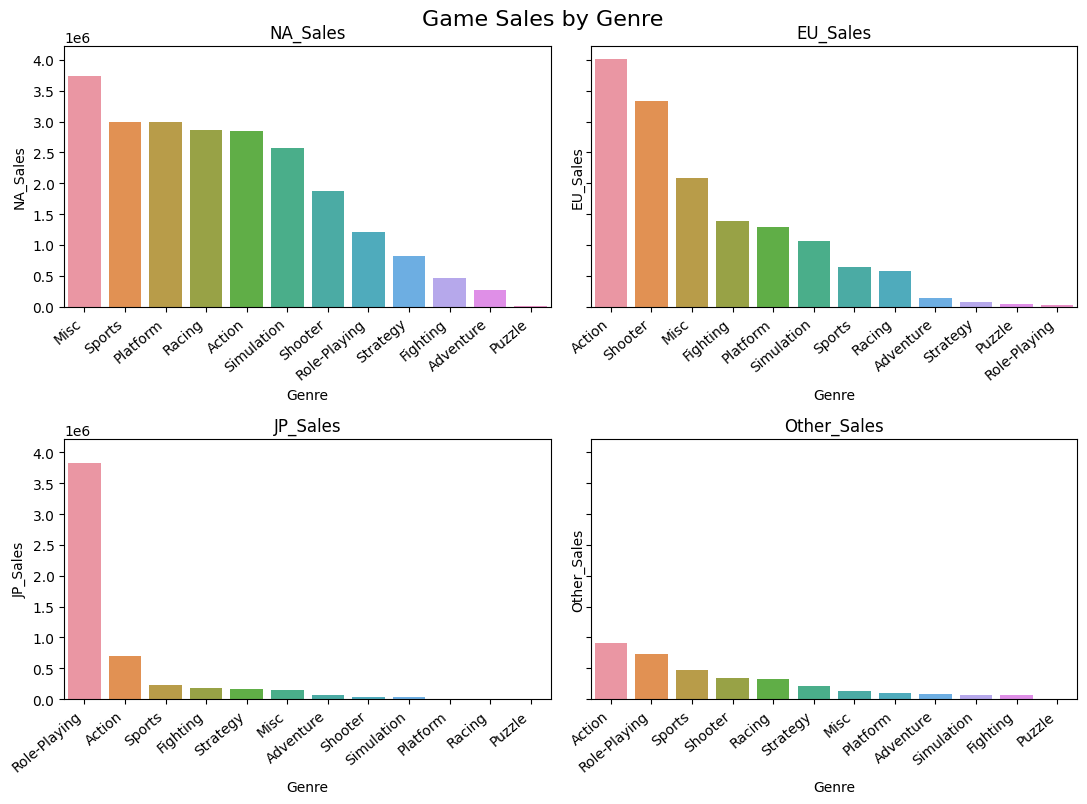

In [221]:
#데이터 시각화(bar chart)

fig, axes = plt.subplots(2, 2, figsize=(11, 8), sharey=True)
fig.suptitle('Game Sales by Genre', y=1, fontsize = 16)

# NA_Sales
sns.barplot(ax=axes[0, 0], x=NA_Sales_genre.index, y=NA_Sales_genre)
axes[0, 0].set_title('NA_Sales')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=40, ha="right")

# EU_Sales
sns.barplot(ax=axes[0, 1], x=EU_Sales_genre.index, y=EU_Sales_genre)
axes[0, 1].set_title('EU_Sales')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=40, ha="right")

# JP_Sales
sns.barplot(ax=axes[1, 0], x=JP_Sales_genre.index, y=JP_Sales_genre)
axes[1, 0].set_title('JP_Sales')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=40, ha="right")

#Other_Sales
sns.barplot(ax=axes[1, 1], x=Other_Sales_genre.index, y=Other_Sales_genre)
axes[1, 1].set_title('Other_Sales')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=40, ha="right")

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

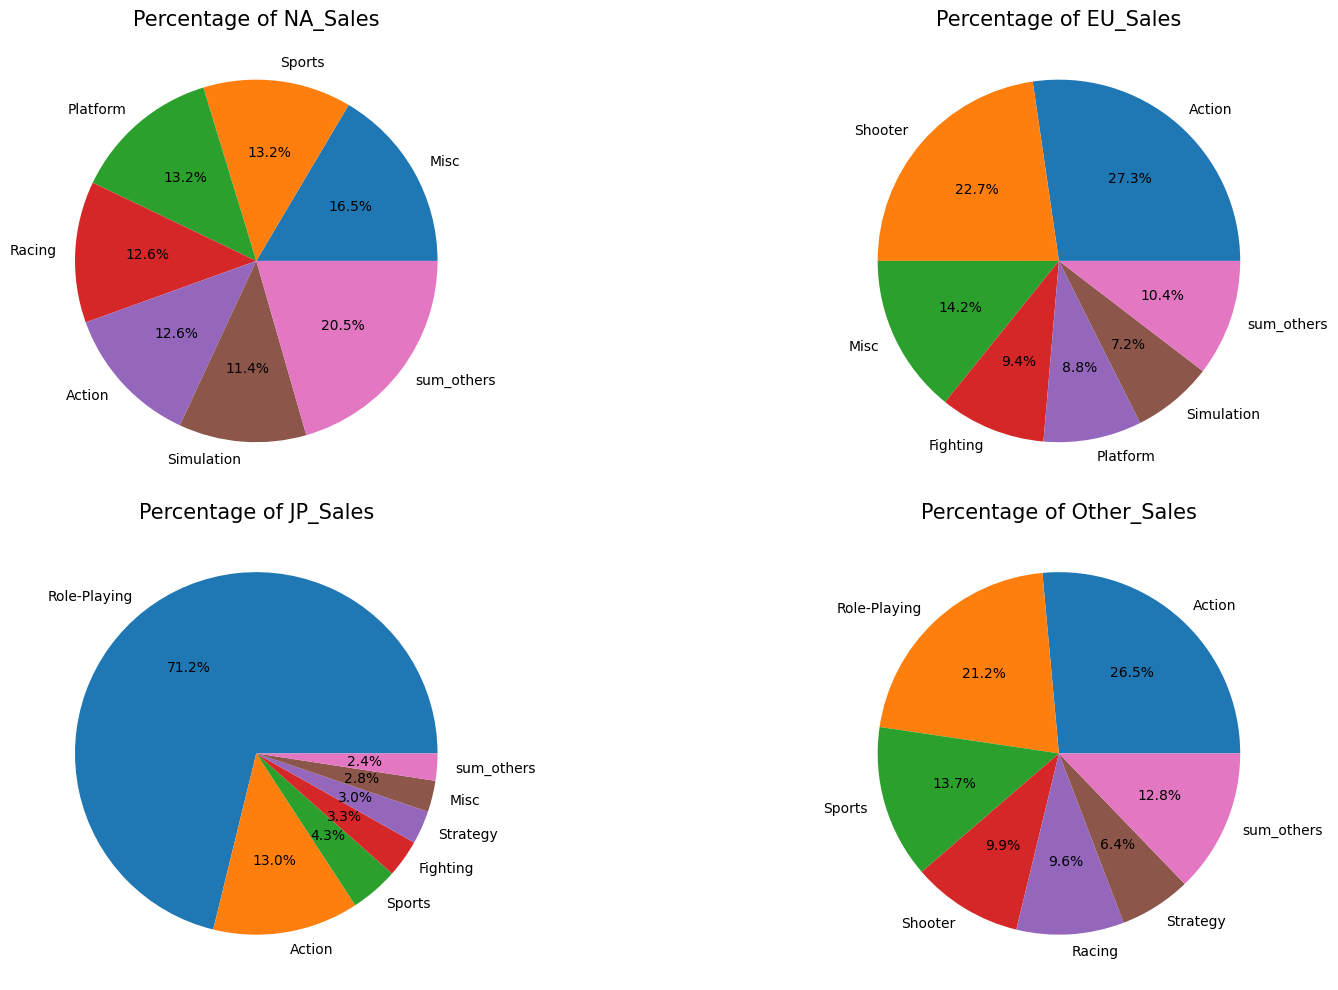

In [222]:
# 데이터 시각화 2 (pie chart)
df_genre_region = data_clean.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
# df_region_genre = df_genre_region.transpose()
fig, axes = plt.subplots(2, 2, figsize=(19, 10))

for i, region in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
    region_sales = df_genre_region[region].sort_values(ascending=False)
    region_sales.loc['sum_others'] = region_sales.values[6:].sum()
    region_sales_123 = region_sales.iloc[[0, 1, 2, 3, 4, 5, 12]]
    plt.subplot(2, 2, i + 1)
    plt.pie(region_sales_123, labels=region_sales_123.index, autopct='%.1f%%')
    plt.title(f'Percentage of {region}', fontdict={'fontsize': 15})
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

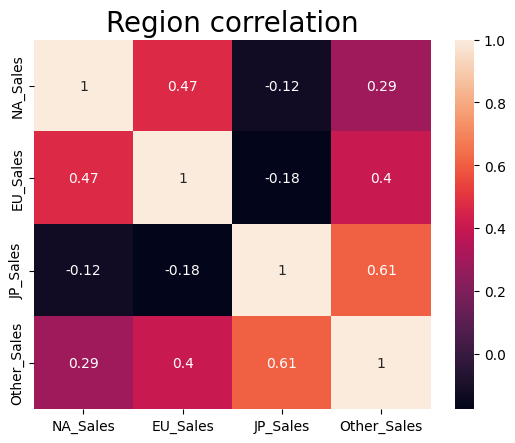

In [223]:
#지역별 상관관계
reg_corr = all_region.corr()
reg_corr
sns.heatmap(reg_corr, annot=True)
plt.title('Region correlation', fontsize=20)
plt.show()
#JP와 Other의 상관계수가 0.61로 약간의 양의 상관관계를 보인다.

**요약**

-북미권 : Misc > Sports > platform 순으로 인기가 있다

-유럽권 : Action > Shooter > Misc 순으로 인기가 있다

-일본 : Role-Playing >> Action > Sports 순

-기타 : Action > Role-Playing > Sports 순

일본과 기타 지역은 장르별 선호 유사성이 약간 있어보이고, 네개 지역 모두에서 Action이 전체적으로 상위권에 분포한다는 점을 알 수 있다

**2. 연도별 게임 트랜드**

---





*   **연도별 장르의 변화**




In [224]:
#연도별 장르의 변화 확인
trend_genre = data_clean.groupby(['Year', 'Genre'])[['Total_Sales']].sum()
trend_genre = trend_genre.reset_index()
trend_genre

,Year,Genre,Total_Sales
0,2000,Action,33.89
1,2000,Adventure,2.96
2,2000,Fighting,1350018.91
3,2000,Misc,60015.49
4,2000,Platform,16.05
...,...,...,...
201,2016,Sports,14.63
202,2016,Strategy,0.52
203,2017,Action,0.01
204,2017,Role-Playing,0.04


In [225]:
trend_pivot = trend_genre.pivot("Year", "Genre", "Total_Sales")
trend_pivot

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2000,33.89,2.96,1350018.91,60015.49,16.05,3.83,220019.78,2980026.06,6.83,3.37,600040.64,8.52
2001,150056.53,8.96,18.10,190016.20,100039.23,7.94,770055.06,22.02,24.81,30019.51,51.47,7.54
2002,1340085.31,80010.99,24.92,200015.43,45.95,5.33,30.15,45.09,47.64,10.82,360064.95,5.51
2003,90067.89,2.12,23.79,720023.07,2990039.83,1.71,50052.13,550029.74,470026.63,21.21,55.96,7.95
2004,220075.93,8.45,16.76,26.10,47.34,8.41,210045.40,10053.94,10046.91,10.89,120060.99,7.14
2005,20085.50,170008.36,19.68,20059.67,80022.73,20.26,20056.38,270028.24,41.57,49.28,200059.33,70005.27
2006,190066.30,30011.45,50022.48,50067.18,49.70,10.79,34.06,210051.58,50038.30,960020.77,160135.96,4.23
2007,105.99,40024.40,17.63,3310087.76,190035.34,23.78,70038.88,50043.81,20070.86,2100046.75,410097.83,9.38
2008,1080134.38,24.91,35.41,140086.04,35.65,15.53,340070.39,40059.65,230059.28,130046.27,360094.88,160011.54


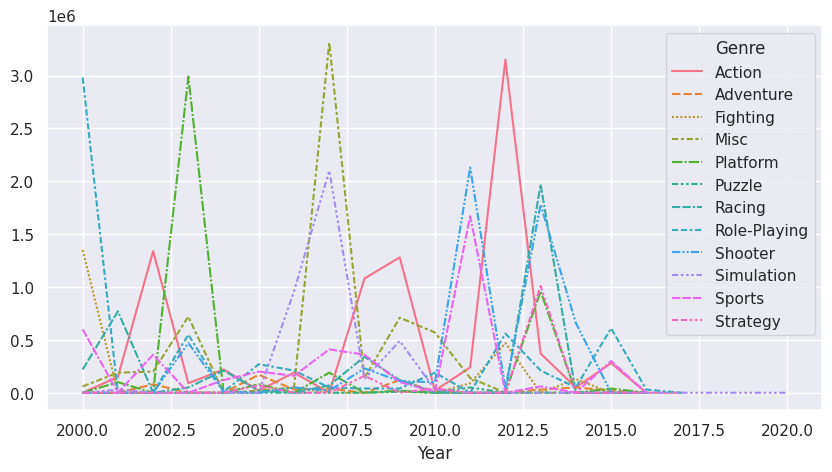

In [226]:
# 연도별 장르 데이터 시각화 (line plot)
sns.set(rc = {'figure.figsize':(10,5)})
# rcParams['figure.figsize'] = 15,8
sns.lineplot(data=trend_pivot)

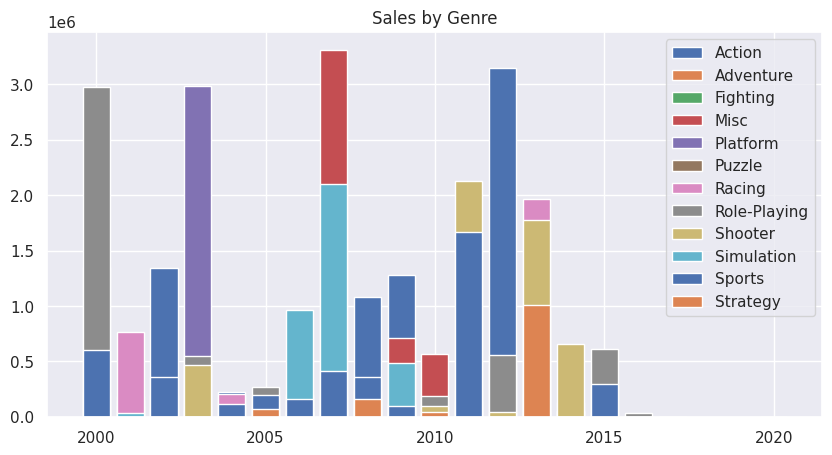

In [227]:
# 연도별 장르 변화 시각화 (bar)
plt.figure()
for column in trend_pivot.columns:
  plt.bar(trend_pivot.index, trend_pivot[column], label=column)
plt.legend(loc='upper right')
plt.title("Sales by Genre")
plt.show()



*   **연도별 지역 변화 확인**



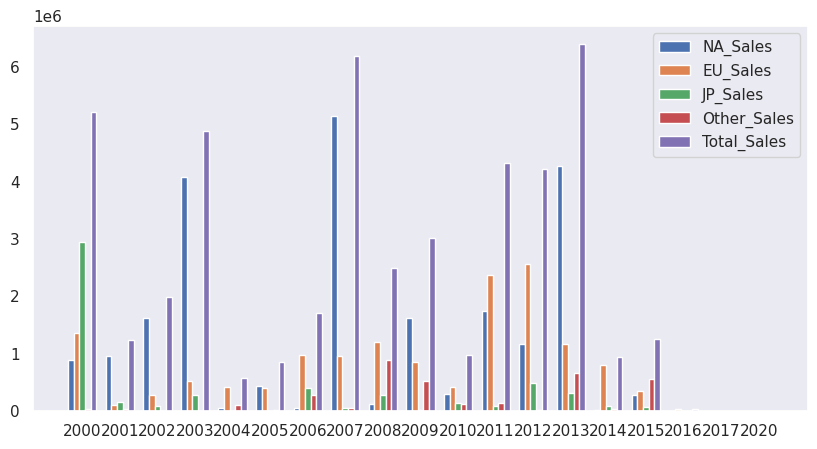

In [228]:
df_region = df_clean.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].sum()
# print(df_region, type(df_region))
# print('행개수', df_region.shape[0])
w = 0.15
nrow = df_region.shape[0]
idx = np.arange(nrow)
# print(idx)

plt.rcParams['axes.grid'] = False   # grid 눈금이 xtick의 가운데를 지나기 때문에 다중그래프의 경우는 보기가 불편함. 
plt.figure()
plt.bar(idx - 2 * w, df_region.NA_Sales, width=w, label='NA_Sales')
plt.bar(idx - w, df_region.EU_Sales, width=w, label='EU_Sales')
plt.bar(idx, df_region.JP_Sales, width=w, label='JP_Sales')
plt.bar(idx + w, df_region.Other_Sales, width=w, label='Other_Sales')
plt.bar(idx + 2 * w, df_region.Total_Sales, width=w, label='Total_Sales')
plt.xticks(idx, df_region.index)
# plt.xlim(1995, 2020)
plt.legend()


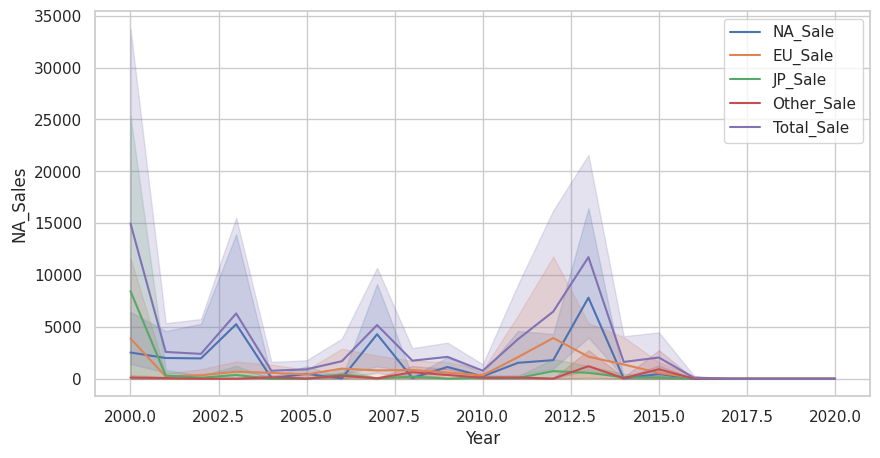

In [229]:
#연도별 지역 트랜드 변화 확인
# sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(numeric_data, ['Year']))
sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax0= sns.lineplot(x='Year', y='NA_Sales', data=data_clean, label="NA_Sale")
ax1 = sns.lineplot(x='Year', y='EU_Sales', data=data_clean, label="EU_Sale")
ax2 = sns.lineplot(x='Year', y='JP_Sales', data=data_clean, label="JP_Sale")
ax3 = sns.lineplot(x='Year', y='Other_Sales', data=data_clean, label="Other_Sale")
ax4 = sns.lineplot(x='Year', y='Total_Sales', data=data_clean, label="Total_Sale")



*   **연도별 플랫폼 변화 확인**



In [230]:
# 연도별 플랫폼 사용 트랜드 확인
platform_pivot = pd.pivot_table(data=data_clean, index='Year', columns='Platform_Groups', values='Total_Sales', aggfunc='sum')
platform_pivot

Platform_Groups,Console,PC,Portable
Year,,,
2000,5210171.17,4.65,20.51
2001,1210224.69,5.50,30097.18
2002,750258.83,8.57,1230124.69
2003,1520239.90,8.91,3350103.22
2004,460271.99,10.39,110125.88
2005,220217.83,20004.38,610234.06
2006,1270317.09,2.91,430192.80
2007,4010396.37,20009.31,2160196.73
2008,1870481.08,70011.58,540181.27


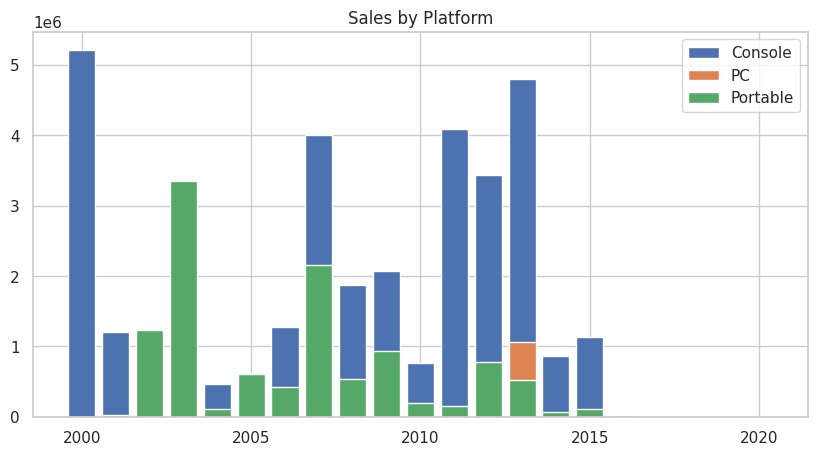

In [231]:
plt.figure()
for column in platform_pivot.columns:
  plt.bar(platform_pivot.index, platform_pivot[column], label=column)
plt.legend(loc='upper right')
plt.title("Sales by Platform")
plt.show()



*   **연도별 퍼블리셔 변화 확인**



In [232]:
top10_publisher = data_clean[['Publisher', 'Total_Sales']].sort_values(by='Total_Sales', ascending=False).head(10)
list_top10_publisher = top10_publisher.Publisher.values
list_top10_publisher

array(['Nintendo', 'SquareSoft', 'Ubisoft', 'Electronic Arts',
       'Activision', 'Activision', '505 Games', 'Take-Two Interactive',
       'THQ', 'Microsoft Game Studios'], dtype=object)

In [233]:
publisher_pivot = pd.pivot_table(data=data_clean, index='Year', columns='Publisher', values='Total_Sales', aggfunc='sum')
Top10_Publisher = publisher_pivot[list_top10_publisher]
Top10_Publisher

Publisher,Nintendo,SquareSoft,Ubisoft,Electronic Arts,Activision,Activision,505 Games,Take-Two Interactive,THQ,Microsoft Game Studios
Year,,,,,,,,,,
2000,34.02,2780003.78,4.66,600024.54,14.49,14.49,NaN,6.04,1350014.50,0.99
2001,45.41,0.25,4.95,45.12,18.61,18.61,NaN,30020.39,22.24,190013.32
2002,48.32,0.12,16.18,1210071.06,25.87,25.87,0.30,20.29,26.83,6.92
2003,2930034.53,2.13,16.91,69.78,21.32,21.32,0.10,10.58,29.36,8.96
2004,60.66,NaN,10015.36,170062.81,39.23,39.23,0.88,24.10,28.73,13.65
2005,490126.88,NaN,20016.43,20066.99,35.42,35.42,1.08,26.27,22.26,5.68
2006,120205.48,NaN,60017.13,60058.24,17.37,17.37,7.49,160020.46,24.96,960009.04
2007,104.16,NaN,30048.50,1040070.01,2020061.45,2020061.45,2150008.20,20019.78,190032.90,26.07
2008,91.14,NaN,230056.81,680083.32,460066.93,460066.93,2.77,370044.98,270030.13,15.29


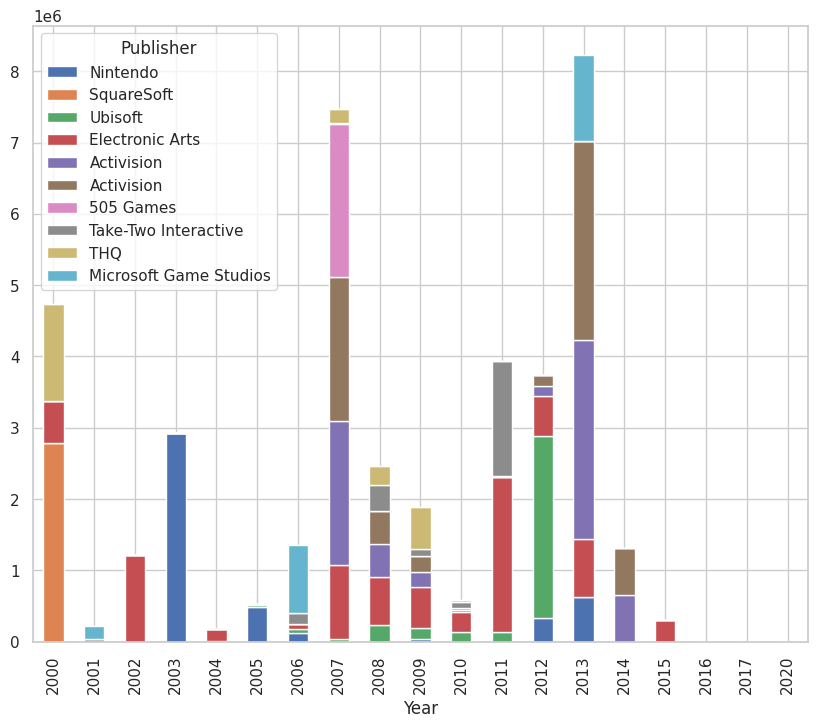

In [234]:
plt.rcParams["figure.figsize"] = (10,8)
Top10_Publisher.plot(kind='bar', stacked=True)

1. 장르 : 연도별 장르의 변화가 매우 다양하지만 전반적으로 Action의 비중이 높아 보인다.

2. 지역 : 전 기간을 통틀어 북미시장과 유럽시장이 선전하고 있다

3. 플랫폼 : 콘솔 플랫폼이 가장 크고 Portable 게임시장은 점점 감소하는 추세이다

4. 퍼블리셔 : 상위 10개사의 분포를 보면 연도별 뚜렷한 독점 추세가 없이 매년 바뀌므로 경쟁이 치열한 것으로 보인다

**3. 출고량이 높은 게임에 대한 분석 및 시각화**

---



In [235]:
# 상위 50개의 게임에 대하여 분석한다
top50 = data_clean.sort_values(by='Total_Sales', ascending=False).head(50)
top50

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_Groups
8487,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28,Portable
3096,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2780000.00,0.14,2780002.53,Console
1405,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2560000.00,0.16,1.14,2560003.94,Console
6920,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2130000.00,0.06,0.69,2130005.21,Console
10330,Guitar Hero II,X360,2007,Misc,Activision,2010000.00,0.02,0.00,0.17,2010000.19,Console
8452,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,1780000.00,1.42,0.05,0.38,1780001.85,Console
4298,Cooking Mama 2: Dinner With Friends,DS,2007,Simulation,505 Games,1610000.00,1.50,0.10,0.39,1610001.99,Portable
5994,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,1610000.00,0.27,0.05,0.18,1610000.50,Console
4343,WWF SmackDown!,PS,2000,Fighting,THQ,2.01,1350000.00,0.06,0.16,1350002.23,Console
4578,Forza Motorsport 5,XOne,2013,Racing,Microsoft Game Studios,1210000.00,0.78,0.01,0.17,1210000.96,Console


In [236]:
#플랫폼, 연도, 장르, 퍼블리셔 별로 출고량 조사
sort_Genre = top50.groupby('Genre')['Total_Sales'].sum()
sort_platform = top50.groupby('Platform')['Total_Sales'].sum()
sort_platform_Groups = top50.groupby('Platform_Groups')['Total_Sales'].sum()
sort_Year = top50.groupby('Year')['Total_Sales'].sum()
sort_Publisher = top50.groupby('Publisher')['Total_Sales'].sum()

Text(0.5, 1.0, "Top 50 Games' sales by Genre")

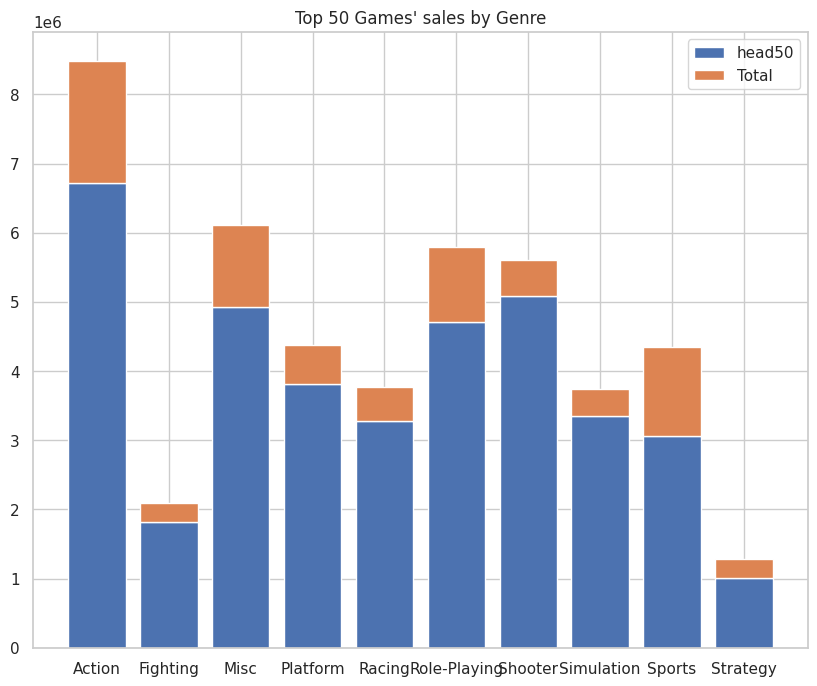

In [237]:
genre_sales = data_clean.groupby('Genre')['Total_Sales'].sum()
# top50_sales.index
total_sales = genre_sales.loc[sort_Genre.index]
net_sales = total_sales - sort_Genre
plt.figure()
plt.bar(sort_Genre.index, sort_Genre, label='head50')
plt.bar(sort_Genre.index, net_sales, bottom=sort_Genre, label='Total')
plt.legend()
plt.title(f"Top 50 Games' sales by Genre")
# 상위 50개의 게임이 전체 출고량의 대부분을 차지한다는 것을 알 수 있다



*   **장르별 특징**





In [238]:
#데이터 확인
sort_Genre.dropna().sort_values(ascending=False)

Genre
Action          6720013.29
Shooter         5090010.79
Misc            4930003.86
Role-Playing    4710007.37
Platform        3810004.21
Simulation      3350003.24
Racing          3280003.63
Sports          3060004.97
Fighting        1820002.53
Strategy        1010000.65
Name: Total_Sales, dtype: float64

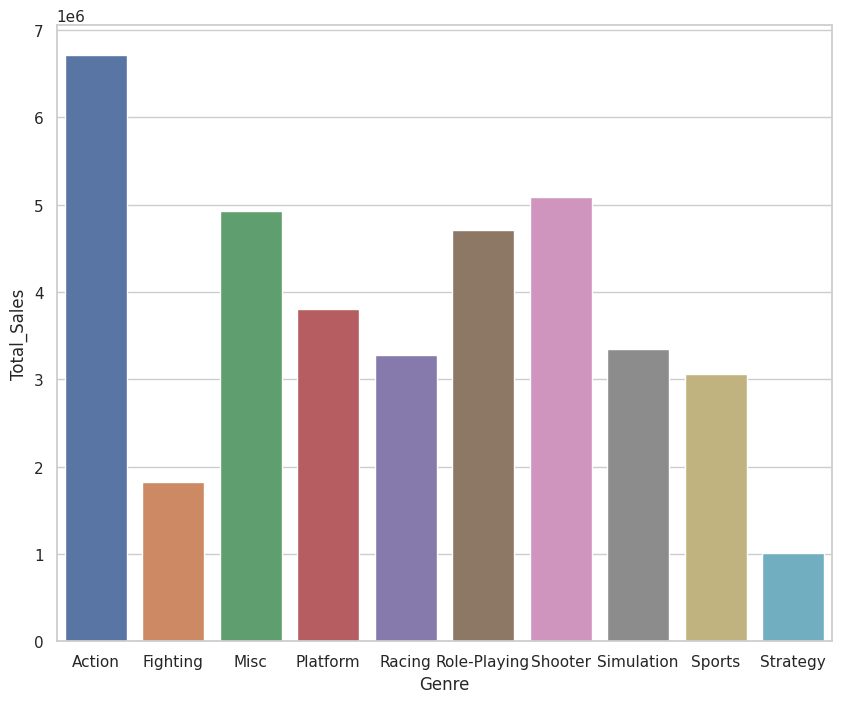

In [239]:
# 데이터 시각화
sns.barplot(x=sort_Genre.index, y=sort_Genre)
# Action이 다소 높다

**플랫폼별 특징**

In [240]:
#데이터 확인
sort_platform = sort_platform.sort_values(ascending=False)
sort_platform

Platform
PS3     7340010.20
X360    6490014.52
PS      4830005.33
GBA     4720004.40
PS4     2860008.36
DS      2860002.05
PS2     2090003.05
XOne    1660001.18
Wii     1650002.08
PC      1010000.65
WiiU     620001.61
N64      600000.04
PSV      470000.30
PSP      320000.45
3DS      260000.32
Name: Total_Sales, dtype: float64

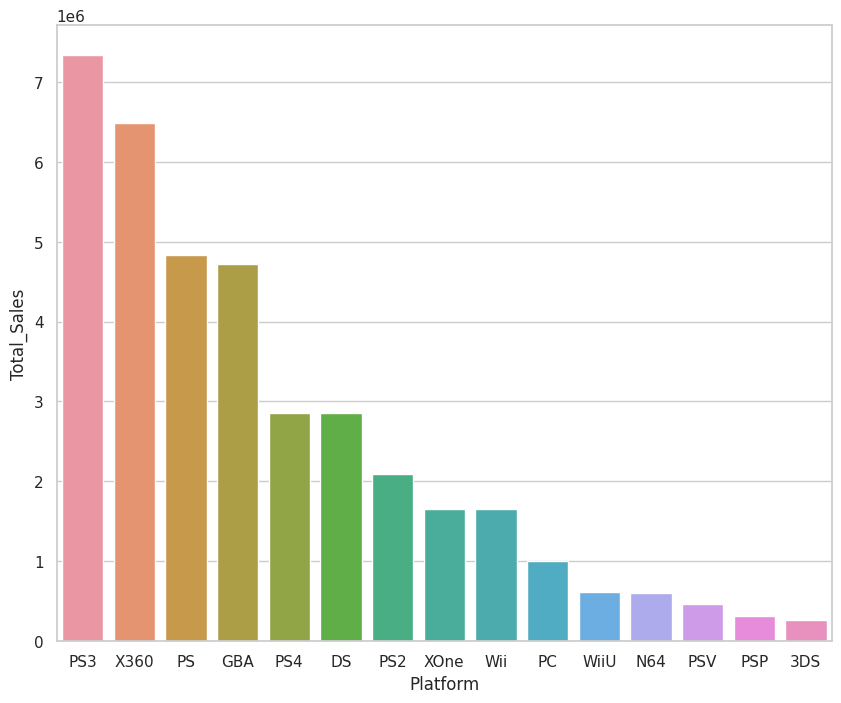

In [241]:
#데이터 시각화
sns.barplot(x=sort_platform.index, y=sort_platform)
# PS3, X360이 높다

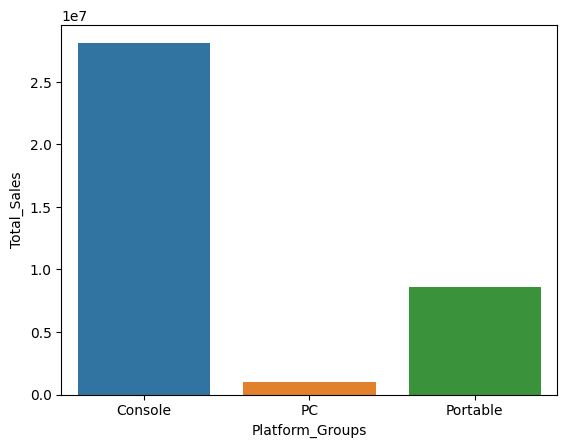

In [242]:
sns.reset_defaults()
sns.barplot(x=sort_platform_Groups.index, y=sort_platform_Groups)
# 콘솔이 독보적이다

**연도별 특징**

In [243]:
#데이터 확인
sort_Year.sort_values(ascending=False)

Year
2013    5920007.28
2007    5690003.76
2000    4950004.98
2003    4490004.52
2012    3910004.93
2011    3740005.71
2009    1950005.33
2008    1900007.44
2002    1210000.78
2015    1080006.51
2006     960000.67
2001     770000.70
2014     660001.06
2010     280000.54
2005     270000.33
Name: Total_Sales, dtype: float64

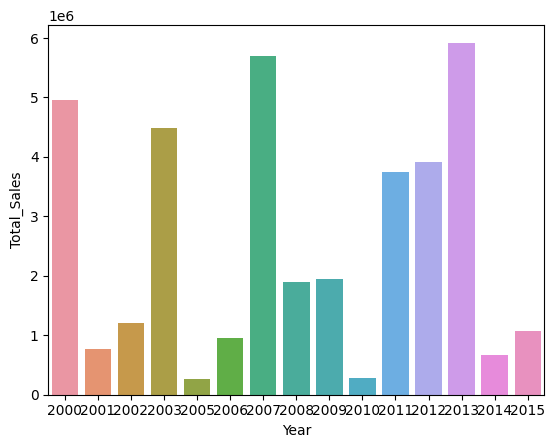

In [244]:
#데이터 시각화
sns.barplot(x=sort_Year.index, y=sort_Year)
# 2007년과 2013년에 출고량 많다

**퍼블리셔별 특징**

In [245]:
#데이터 확인
sort_Publisher.sort_values(ascending=False)

Publisher
Electronic Arts                           8030014.32
Activision                                5900004.37
Nintendo                                  4150004.58
Ubisoft                                   2790006.13
SquareSoft                                2780002.53
Microsoft Game Studios                    2170001.63
505 Games                                 2150002.03
THQ                                       2040004.99
Take-Two Interactive                      1980000.70
Capcom                                     930004.73
Midway Games                               720000.75
Warner Bros. Interactive Entertainment     690000.72
Sega                                       620001.65
Namco Bandai Games                         560003.17
Sony Computer Entertainment                490000.56
Empire Interactive                         480000.39
SCi                                        290000.48
Infogrames                                 290000.31
Disney Interactive Studios          

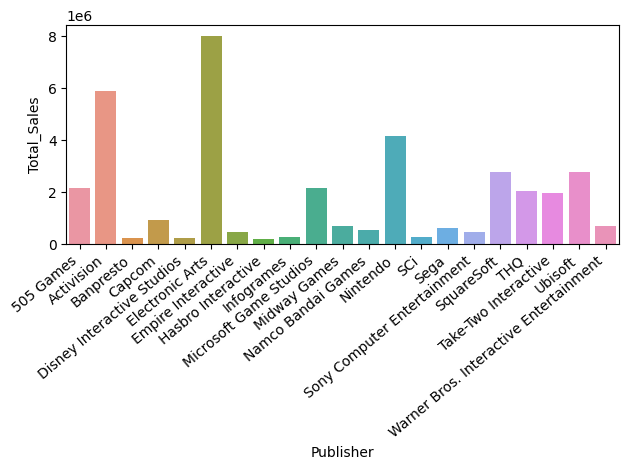

In [246]:
#데이터 시각화
ax = sns.barplot(x=sort_Publisher.index, y=sort_Publisher)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
# Electronic Arts사가 압도적이다

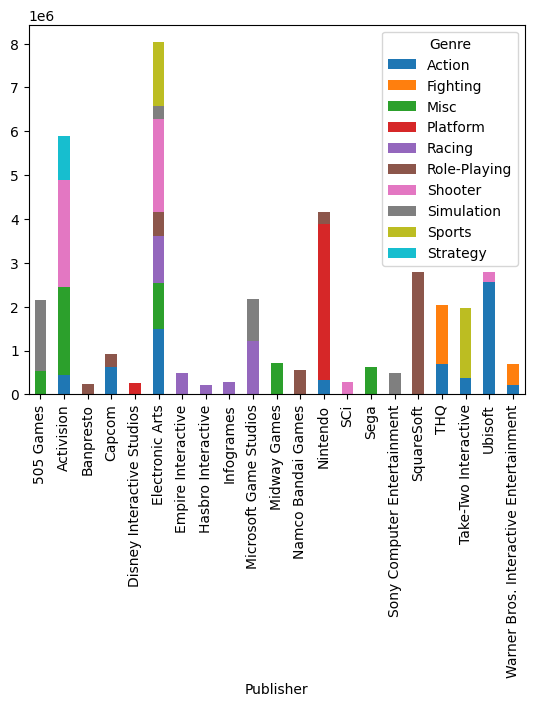

In [247]:
# 퍼블리셔별 장르 분포 분석
sort_publisher_genre = pd.pivot_table(data=top50, index='Publisher', columns='Genre', values='Total_Sales', aggfunc='sum')
sort_publisher_genre
sort_publisher_genre.plot(kind='bar', stacked=True)

In [248]:
# Action의 퍼블리셔 확인
test = pd.pivot_table(data=data_clean, index='Genre', columns='Publisher', values='Total_Sales', aggfunc='sum')
a = test.loc[['Action']]
a = a.T
publi = a.loc[a.Action.notna()]
publi.sort_values(by='Action', ascending=False)

Genre,Action
Publisher,
Ubisoft,2720139.99
Electronic Arts,1540111.31
Capcom,730074.33
THQ,690088.24
Activision,650132.70
...,...
Titus,0.01
Storm City Games,0.01
Alawar Entertainment,0.01


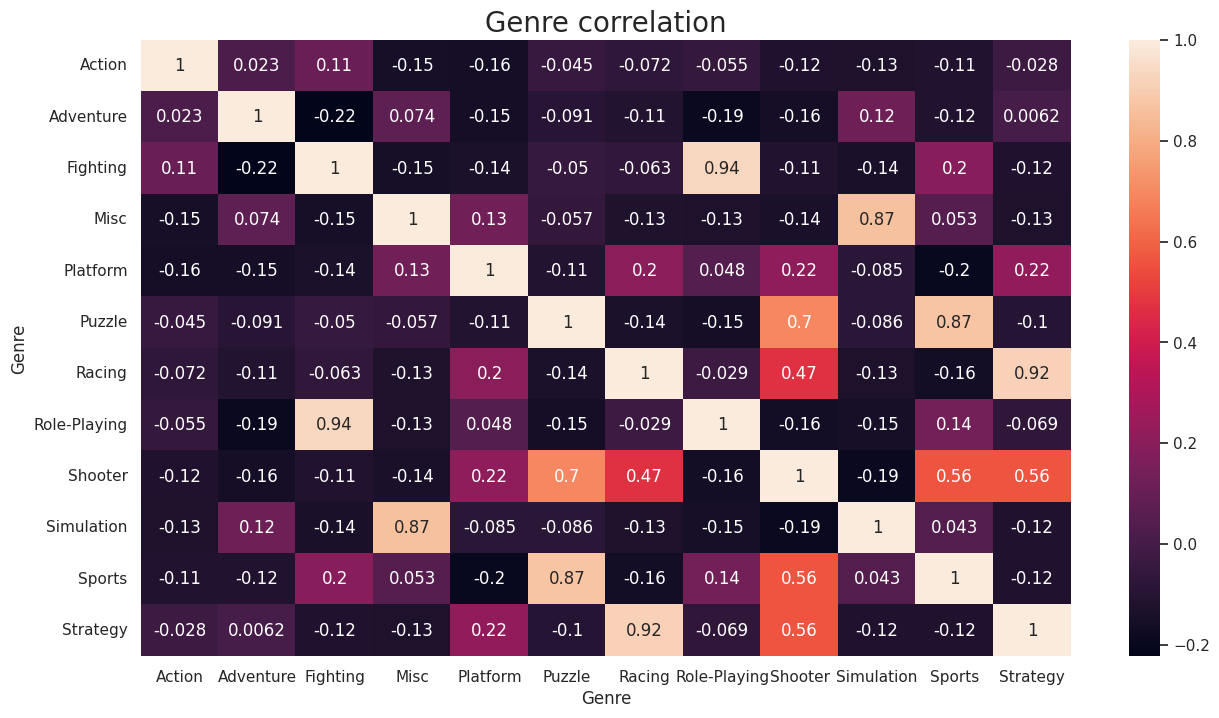

In [249]:
#장르별 상관관계
genre_corr = trend_pivot.corr()
genre_corr
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(genre_corr, annot=True)
plt.title('Genre correlation', fontsize=20)
plt.show()
#상관계수가 1에 근접한 양의 상관관계를 보이는 장르는 Stragedy-Racing(0.92)와 Fightign-Role_Playing(0.94)인 것으로 보인다
# Action 장르의 경우 어떤 장르와도 유사점이 없다


**요약** : 출고량이 높은 상위 50개 게임을 분석해보면, 가장 많이 사용된 플랫폼이 이고 콘솔이고, 2007년과 2013년도에 게임 출고량이 다소 많다는 걸 알 수 있다. 퍼블리셔는 Electronic Arts가 가장 출고량이 많으며 Activision이 뒤따르는데 두 퍼블리셔별 개발 장르는 다양하다. 전체 상위 50개 게임의 장르는 Action이 가장 큰 부분을 차지한다. Action장르의 다른 장르와의 상관관계는 전혀 없어 보인다.


**결론 : 다음 분기에 어떤 게임을 출시할까?**
*   Action/Shooter장르
*   콘솔 플랫폼, 그러나 2015년 이후 데이터가 없어 분석할 수 없었지만 현재 게임시장에서 큰 파이를 차지하는 모바일 플랫폼 활용
*   Electronic Arts사/Ubisoft의 액션/슈팅 게임을 참고하여 개발하도록 함



